## #MakeoverMonday 2019 week 37

Importing libraries, data

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
df_books = pd.read_csv('MM2019w37.csv')

Overviewing the data

In [69]:
df_books.head()

,Material Type,Title,Series,Checkout Year,Checkout Month,Checkouts,Subjects,Publisher,Publication Year
0,BOOK,#1 Suspect,NaN,2019,8,1,"Private investigators California Fiction, Priv...","Little, Brown and Co.,",2012
1,BOOK,#1 Suspect,NaN,2019,6,1,"Private investigators California Fiction, Priv...","Little, Brown and Co.,",2012
2,BOOK,#1 Suspect,NaN,2019,6,2,"Private investigators California Fiction, Priv...","Little, Brown and Co.,",2012
3,BOOK,#1 Suspect,NaN,2019,5,1,"Private investigators California Fiction, Priv...","Little, Brown and Co.,",2012
4,BOOK,#1 Suspect,NaN,2019,5,2,"Private investigators California Fiction, Priv...","Little, Brown and Co.,",2012


In [70]:
df_books.columns = ['material_type', 'title', 'series', 'checkout_year', 'checkout_month', 'checkouts', 'subjects', 'publisher', 'publication_year']

In [71]:
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17918 entries, 0 to 17917
Data columns (total 9 columns):
material_type       17918 non-null object
title               17918 non-null object
series              12539 non-null object
checkout_year       17918 non-null int64
checkout_month      17918 non-null int64
checkouts           17918 non-null int64
subjects            17918 non-null object
publisher           17918 non-null object
publication_year    17918 non-null object
dtypes: int64(3), object(6)
memory usage: 1.2+ MB


Cleaning the publication_year column

In [72]:
df_books.publication_year = df_books.publication_year.str.replace('©', '').str.replace('[', '').str.replace(']', '').str.replace('.', '').str.replace('c', '').str.replace('C', '')

In [73]:
df_books.publication_year.value_counts()

2012          1897
2011          1703
2009          1573
2010          1507
2014          1425
2013          1263
2016          1133
2015          1102
2008          1019
2007           972
2017           956
2001           468
2018           418
2006           398
2005           390
2004           234
2003           226
1999           191
2002           177
2000           113
1996            87
2019            87
2000, 1995      82
2011, 2010      78
2005, 2004      57
2009, 2005      50
2012, 2011      44
2009, 2007      43
2007, 2005      41
2007, 2006      40
2008, 2007      40
2010, 2001      21
2008, 2006      19
2004, 2003      18
1998            18
2009, 2008      17
2011, 2002      11
Name: publication_year, dtype: int64

In [74]:
df_books.publication_year = df_books.publication_year.str.split(pat=',', expand=True) #keep the latest publication_year

In [75]:
df_books.publication_year.value_counts()

2012    1941
2011    1792
2009    1683
2010    1528
2014    1425
2013    1263
2016    1133
2015    1102
2008    1078
2007    1053
2017     956
2001     468
2005     447
2018     418
2006     398
2004     252
2003     226
2000     195
1999     191
2002     177
2019      87
1996      87
1998      18
Name: publication_year, dtype: int64

Visualising checkouts and publications per year

In [76]:
df_books.checkout_year = pd.to_numeric(df_books.checkout_year)

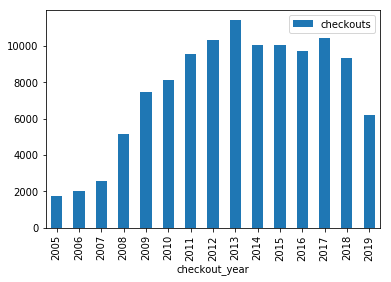

In [77]:
df_books.groupby('checkout_year').checkouts.sum().reset_index().plot('checkout_year', 'checkouts', kind='bar')

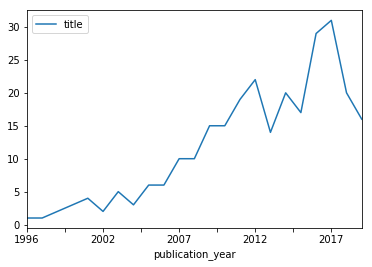

In [78]:
df_books.groupby('publication_year').title.nunique().reset_index().plot('publication_year', 'title')

Exporting df

In [81]:
df_books.to_excel('MM2019w37_clean.xlsx', index=False)